In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
ptcd = pd.read_csv("part_conditions.csv")
defects = pd.read_csv("defects.csv")

In [3]:
ptcd.head()

,unit_number,cycle_number,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [4]:
ptcd[ptcd["RUL"] == 0].groupby("unit_number").min()["cycle_number"].min()

128

In [5]:
ptcd[ptcd["RUL"] == 0].groupby("unit_number").mean()["cycle_number"].mean()

206.31

In [6]:
ptcd[ptcd["RUL"] == 0].groupby("unit_number").max()["cycle_number"].max()

362

PART 1 QUESTION 2 

The fewest number of cycles it took an enginer to fail was 128. The average number of cycles it took an enginer to fail was 206. The largest number of cycles it took an engine to fail was 362. 

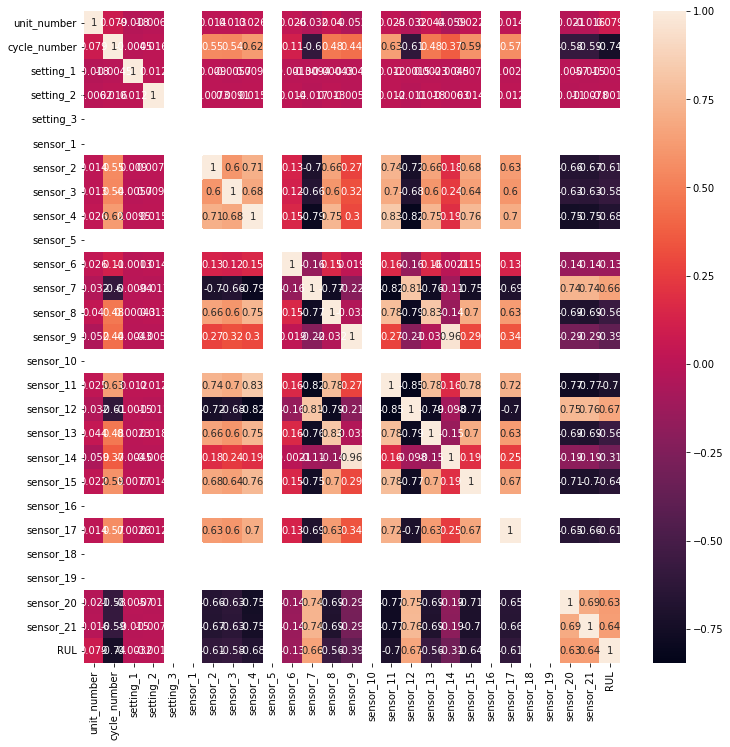

In [7]:
plt.figure(figsize = (12,12))
sns.heatmap(data = ptcd.corr(), annot = True)
plt.show()

In [8]:
percent_na = ptcd.isna().sum() / ptcd.shape[0]
print(percent_na)

unit_number     0.0
cycle_number    0.0
setting_1       0.0
setting_2       0.0
setting_3       0.0
sensor_1        0.0
sensor_2        0.0
sensor_3        0.0
sensor_4        0.0
sensor_5        0.0
sensor_6        0.0
sensor_7        0.0
sensor_8        0.0
sensor_9        0.0
sensor_10       0.0
sensor_11       0.0
sensor_12       0.0
sensor_13       0.0
sensor_14       0.0
sensor_15       0.0
sensor_16       0.0
sensor_17       0.0
sensor_18       0.0
sensor_19       0.0
sensor_20       0.0
sensor_21       0.0
RUL             0.0
dtype: float64


In [9]:
ptcd.groupby("unit_number").mean()

,cycle_number,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
unit_number,,,,,,,,,,,,,,,,,,,,,
1,96.5,-0.000189,0.000048,100.0,518.67,642.621042,1589.485521,1407.262135,14.62,21.610000,...,2388.110833,8128.913542,8.436555,0.03,392.854167,2388.0,100.0,38.840052,23.306310,95.5
2,144.0,0.000051,0.000088,100.0,518.67,642.435226,1588.181986,1404.265854,14.62,21.609338,...,2388.053554,8143.246167,8.423983,0.03,392.386760,2388.0,100.0,38.901150,23.338997,143.0
3,90.0,0.000137,-0.000014,100.0,518.67,642.543743,1588.715084,1405.628994,14.62,21.609777,...,2388.047430,8159.557654,8.430236,0.03,392.754190,2388.0,100.0,38.882793,23.321931,89.0
4,95.0,0.000150,0.000067,100.0,518.67,642.662381,1590.563280,1408.253915,14.62,21.609947,...,2388.082275,8154.574444,8.439303,0.03,393.291005,2388.0,100.0,38.830265,23.294502,94.0
5,135.0,0.000136,-0.000061,100.0,518.67,642.451970,1588.153271,1404.878439,14.62,21.609331,...,2388.029071,8161.807844,8.425968,0.03,392.646840,2388.0,100.0,38.891078,23.336284,134.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,168.5,-0.000120,0.000027,100.0,518.67,642.629821,1589.856190,1407.889970,14.62,21.609881,...,2388.100268,8136.360268,8.438163,0.03,393.110119,2388.0,100.0,38.826339,23.300243,167.5
97,101.5,-0.000059,0.000077,100.0,518.67,642.522624,1589.431436,1405.888267,14.62,21.609901,...,2388.060941,8154.680149,8.429250,0.03,392.801980,2388.0,100.0,38.881337,23.326633,100.5
98,78.5,0.000269,-0.000066,100.0,518.67,642.584872,1588.884167,1406.270962,14.62,21.609808,...,2388.070000,8145.904167,8.433159,0.03,392.724359,2388.0,100.0,38.860128,23.331571,77.5


PART 1 QUESTION 3A

Yes, it looks like sensors 7, 12, 20, and 21 are strongly correlated to the RUL. 

PART 1 QUESTION 3B

The correlation value is undefined for setting 3 and sensors 1, 5, 10, 16, 18, and 19 because that setting and those sensors recorded the same number for every engine. In the calculation of the correlation coefficient, the denominator includes the total sum of squares. If all the values are the same, the total sum of squares will be zero, and a number divided by zero is undefined. 

In [10]:
ptcd = ptcd.drop(['setting_3','sensor_1','sensor_5','sensor_10','sensor_16','sensor_18','sensor_19'],axis = 1)

PART 1 QUESTION 3C

Since those columns would not have contributed to the model, yes it is reasonable to drop them.

In [11]:
x = ptcd.drop(["unit_number","cycle_number","RUL"],axis = 1)
y = ptcd["RUL"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LinearRegression()
model.fit(x_train, y_train)
print(model.score(x_train,y_train))

y_pred = model.predict(x_test)
print(r2_score(y_test,y_pred))

0.5800913687077622
0.5777089758808549


Text(0.5, 0, 'RUL')

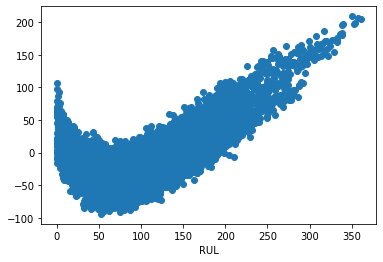

In [12]:
residuals = (y_test - y_pred)
plt.scatter(y_test, residuals)
plt.xlabel("RUL")

PART 1 QUESTION 4A

The score of the model on the training and test data are both approximately 0.58. 

I think I got these scores because the model is not overfit, so it performs approximately the same on the training and test data. I think these scores are low because there may be too many sensors, some of which are not that strongly correlated to failure, especially if there are different types of failure.

From the residuals, I notice they are lowest at approximately an RUL of 50 cycles, and for lower and higher RULS the residuals are higher. The residuals are closest to 0 around an RUL of 0 and 120.

PART 1 QUESTION 4C
This model is predicting the number of cycles until failure (RUL) from the setting conditions and sensor readings. In real life, this would represent exposing the engine to multiple cycles to mimic extended use and monitoring the sensors to estimate the engine's remaining viability until failure. 

In [13]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator = LinearRegression(), n_features_to_select = 1)
fit = rfe.fit(x_train, y_train)
print(fit.n_features_)
print(fit.ranking_)

1
[17 16 10 12  5 14  4 13  2  1  3 15  7  9 11  6  8]


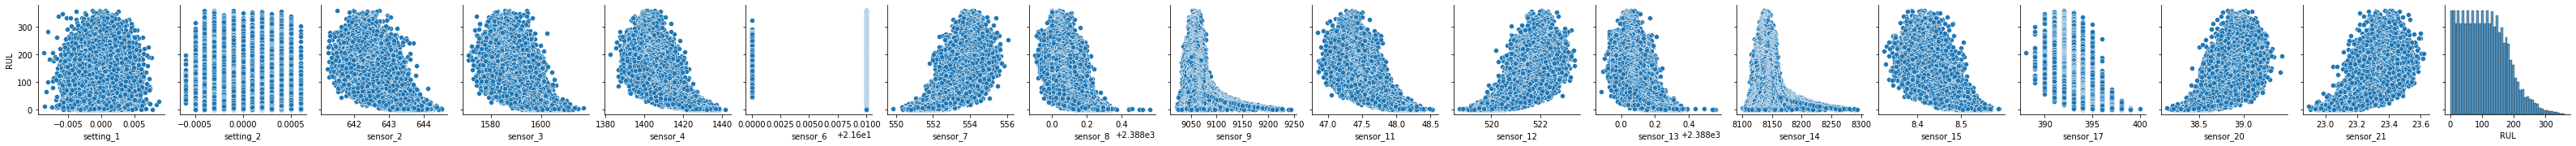

In [14]:
sns.pairplot(data=ptcd.drop(["unit_number","cycle_number"],axis = 1),y_vars=['RUL'])

PART 1 QUESTION 5B

I think the three worst predictors were ranked as such because from the plot, there is no linear trend of the data - the plots for setting 1 and setting 2 look like a cloud while the plot for sensor 14 almost looks like a bell curve. 

In [15]:
x = ptcd.drop(["unit_number","cycle_number","RUL"],axis = 1)
y = y.clip(upper = 128)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LinearRegression()
model.fit(x_train, y_train)
print(model.score(x_train,y_train))

y_pred = model.predict(x_test)
print(r2_score(y_test,y_pred))

0.7310232560043102
0.7305875030771348


PART 1 QUESTION 6B

The training and test scores improved from about 0.58 to about 0.73, a 25% improvement. 

Text(0.5, 0, 'RUL')

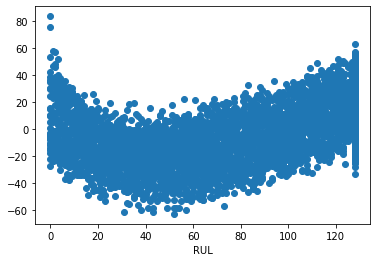

In [16]:
residuals = (y_test - y_pred)
plt.scatter(y_test, residuals)
plt.xlabel("RUL")

PART 1 QUESTION 6B CONTINUED

The residuals have smaller extreme values - whereas before the range of residuals was from -100 to 200, now the range is from -60 to 80. There is also a weaker trend of the residuals - whereas before the residuals had a positive linear relationship at RULs above 50, now the trend still exists but is truncated. The residuals look like a snippet of the previous residuals plot, which makes sense since the model was run on a snippet of the previous dataset. 

In [17]:
defects = defects.drop(["Unnamed: 0"], axis = 1)

In [18]:
defects.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,fault_type
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


<AxesSubplot:xlabel='fault_type'>

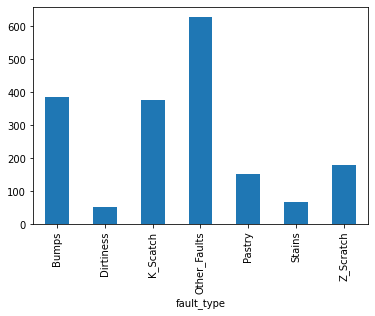

In [19]:
defects.groupby("fault_type").count()["X_Minimum"].plot.bar()

In [20]:
defects.groupby("fault_type").count()["X_Minimum"]

fault_type
Bumps           385
Dirtiness        51
K_Scatch        376
Other_Faults    628
Pastry          152
Stains           68
Z_Scratch       180
Name: X_Minimum, dtype: int64

PART 2 QUESTION 2
The distribution of fault types is failure by 385 bumps, 51 dirtiness, 376 K scratches, 628 other, 152 pastry, 68 stains, and 180 Z scratches.

In [21]:
from sklearn.linear_model import LogisticRegression

x = defects.drop(["fault_type"],axis = 1)
y = defects["fault_type"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred, labels = ["Bumps","Dirtiness","K_Scratch","Other_Faults","Pastry","Stains","Z_Scratch"])
print(cm)

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
#print("Precision: ", metrics.precision_score(y_test,y_pred))
#print("Recall: ", metrics.recall_score(y_test,y_pred))

[[66  0  0 46  0  0  0]
 [ 8  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  0]
 [55  0  0 99  0  0  0]
 [15  0  0 24  0  0  0]
 [19  0  0  4  0  0  0]
 [19  0  0 22  0  0  0]]
Accuracy:  0.47282608695652173


C:\Users\emund\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


PART 1 QUESTION 3B

The confusion matrix is telling me that the model is not classifying the various defects successfully since there are high counts of misclassifications (i.e. 45, 26). The accuracy is only 0.70, which is poor to fair. The most improperly classified is Other Faults.

In [22]:
model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_pred, labels = ["Bumps","Dirtiness","K_Scratch","Other_Faults","Pastry","Stains","Z_Scratch"])
print(cm)

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
#print("Precision: ", metrics.precision_score(y_test,y_pred))
#print("Recall: ", metrics.recall_score(y_test,y_pred))

C:\Users\emund\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[[ 42   0   0  73   0   0   0]
 [  3   0   0  18   0   0   0]
 [  0   0   0   0   0   0   0]
 [ 30   0   0 136   0   0   0]
 [ 10   0   0  33   0   0   0]
 [  5   0   0  18   0   0   0]
 [ 13   0   0  29   0   0   0]]
Accuracy:  0.49094202898550726


PART 2 QUESTION 3C

Yes, the accuracy of my model improves at 200 iterations.

In [23]:
model = LogisticRegression(max_iter=5000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_pred, labels = ["Bumps","Dirtiness","K_Scratch","Other_Faults","Pastry","Stains","Z_Scratch"])
print(cm)

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
#print("Precision: ", metrics.precision_score(y_test,y_pred))
#print("Recall: ", metrics.recall_score(y_test,y_pred))

[[ 29   0   0  85   0   2   0]
 [  2   0   0  20   0   0   0]
 [  0   0   0   0   0   0   0]
 [ 13   0   0 159   0   0   7]
 [  9   0   0  35   0   0   0]
 [  0   0   0   5   0  18   0]
 [  0   0   0  39   0   0   3]]
Accuracy:  0.552536231884058


C:\Users\emund\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


PART 2 QUESTION 3C CONTINUED

Yes, the accuracy of my model improves at 5000 iterations.
I think I observe this because the model fits better to the data with more iterations.

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred, labels = ["Bumps","Dirtiness","K_Scratch","Other_Faults","Pastry","Stains","Z_Scratch"])
print(cm)

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
#print("Precision: ", metrics.precision_score(y_test,y_pred))
#print("Recall: ", metrics.recall_score(y_test,y_pred))

[[ 63   0   0  48   3   1   1]
 [  1   6   0   9   6   0   0]
 [  0   0   0   0   0   0   0]
 [ 30   0   0 117  18   2   6]
 [  5   0   0  18  17   1   4]
 [  0   0   0   6   0  17   0]
 [  0   0   0   5   0   0  35]]
Accuracy:  0.6612318840579711


C:\Users\emund\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [26]:
model1 = LogisticRegression(max_iter = 2000, penalty = "l2", C = .1)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred1)
print(cm)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred1))

model2 = LogisticRegression(max_iter = 2000, penalty = "l2", C = 1)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred2)
print(cm)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred2))

model3 = LogisticRegression(max_iter = 2000, penalty = "l2", C = 10)
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred3)
print(cm)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred3))

model4 = LogisticRegression(max_iter = 2000, penalty = "l2", C = 100)
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred4)
print(cm)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred4))

model5 = LogisticRegression(max_iter = 2000, penalty = "l2", C = 1000)
model5.fit(x_train, y_train)
y_pred5 = model5.predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred5)
print(cm)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred5))

model6 = LogisticRegression(max_iter = 10000, penalty = "l2", C = 10000)
model6.fit(x_train, y_train)
y_pred6 = model6.predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred6)
print(cm)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred6))

[[ 60   0   0  53   0   0   3]
 [  1   0   0  20   1   0   0]
 [  0   0 107  15   0   0   0]
 [ 34   0  13 124   2   0   9]
 [  6   0   1  25   9   0   4]
 [  0   0   0  23   0   0   0]
 [  0   0   2   6   0   0  34]]
Accuracy:  0.605072463768116
[[ 63   0   0  48   3   1   1]
 [  1   5   0  10   6   0   0]
 [  1   0 110   8   0   3   0]
 [ 30   0  10 115  18   3   6]
 [  5   0   0  18  17   1   4]
 [  0   0   0   6   0  17   0]
 [  0   0   2   5   0   0  35]]
Accuracy:  0.6557971014492754
[[ 67   0   0  42   3   2   2]
 [  1  14   0   5   2   0   0]
 [  0   0 116   6   0   0   0]
 [ 27   4   9 112  19   5   6]
 [  3   0   0  18  20   0   4]
 [  0   0   0   2   0  21   0]
 [  0   0   1   6   0   0  35]]
Accuracy:  0.697463768115942
[[ 67   0   0  42   3   2   2]
 [  1  14   0   5   2   0   0]
 [  0   0 118   4   0   0   0]
 [ 27   3  10 111  21   5   5]
 [  3   1   0  17  20   0   4]
 [  0   0   0   5   0  18   0]
 [  0   0   1   6   0   0  35]]
Accuracy:  0.6938405797101449


C:\Users\emund\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[[ 68   0   0  41   3   2   2]
 [  1  14   0   5   2   0   0]
 [  0   0 117   5   0   0   0]
 [ 28   5  10 110  19   5   5]
 [  4   1   0  16  21   0   3]
 [  0   0   0   4   0  19   0]
 [  0   0   1   4   0   0  37]]
Accuracy:  0.6992753623188406
[[ 66   0   0  42   3   2   3]
 [  0  16   0   4   2   0   0]
 [  0   0 118   4   0   0   0]
 [ 28   5   8 113  17   6   5]
 [  4   1   0  14  22   1   3]
 [  0   0   0   5   0  18   0]
 [  0   0   1   4   0   0  37]]
Accuracy:  0.7065217391304348


PART 1 QUESTION 5

The optimal value of C is 10000, and I notice as C increases, the accuracy increases and number of improper classifications decreases. This tells me that including regularization benefits this model.